# Opgave 1

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
def disc(a, b, c):
    return np.sqrt(b**2 - 4 * a * c)

def method1(a, b, c):
    d = disc(a, b, c)
    return ((-b + d) / (2 * a), (-b - d) / (2 * a))

def method2(a, b, c):
    d = disc(a, b, c)
    return ((2 * c) / (-b + d), (2 * c) / (-b - d))

## Del A

Først med 16 bit

In [6]:
a = np.float16(10**(-5))
b = np.float16(10**3)
c = np.float16(10**3)

print(method1(a, b, c))
print(method2(a, b, c))

(-1.0000000113532657, -99864379.95238094)
(-99864379.81859411, -1.0000000100135806)


In [7]:
a = np.float32(10**(-5))
b = np.float32(10**3)
c = np.float32(10**3)

print(method1(a, b, c))
print(method2(a, b, c))

(-1.000000011368684, -100000001.52621254)
(-100000001.38934413, -1.00000001)


In [8]:
a = np.float64(10**(-5))
b = np.float64(10**3)
c = np.float64(10**3)

print(method1(a, b, c))
print(method2(a, b, c))

(-1.0000000088439265, -99999998.99999999)
(-99999999.11560737, -1.0000000100000002)


Resultatet i wolfram alpha er 

```
x1 = -1.00000001000000020000000500000014
x2 = -9.99999989999999899999997999999949 × 10^7
```

64 bit ser ud til at passe ret godt. 

De andre nær så godt.
Sjovt at 16 og 32 bit næsten er de samme.

Ser desuden ud til at de to metoder ikke er ens.
TODO forklar dette.

# Del B

In [9]:
def kappa(f, x0, x_delta):
    intm = ( np.abs(f(x0 + x_delta) - f(x0)) ) / (np.abs( f(x0) ))
    return intm * ( np.abs(x0) / np.abs(x_delta) )

In [10]:
def fgen(a, b, c):
    return lambda x: a * x**2 + b*x + c

<bound method Figure.show of <Figure size 720x720 with 6 Axes>>

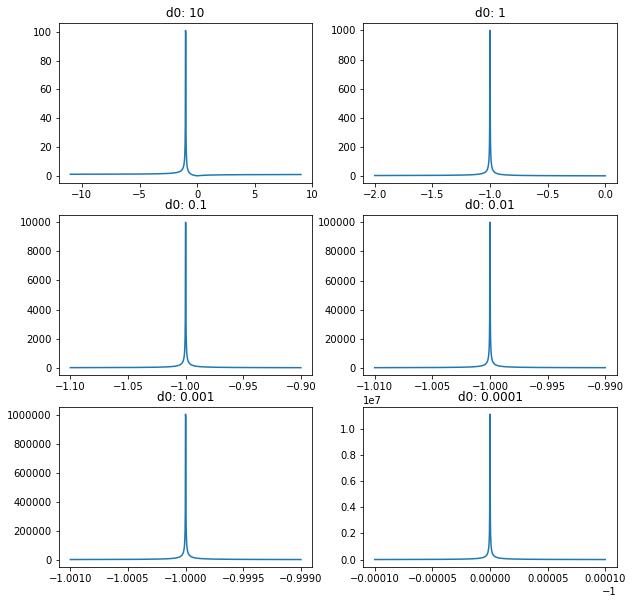

In [11]:
f = fgen(10**(-5), 10**3, 10**3)

x_delta = 10^(-5)
xhat0 = -1
d0s = (10**1, 10**0, 10**(-1), 10**(-2), 10**(-3), 10**(-4))

def subplot(axs, d0):
    axs.set_title(f"d0: {d0}")
    x0 = np.linspace(xhat0 - d0, xhat0 + d0, 1000, True)
    
    axs.plot(x0, kappa(f, x0, x_delta))

fig = plt.figure(1, (10, 10))
axs = fig.subplots(3, 2)

subplot(axs[0, 0], d0s[0])
subplot(axs[0, 1], d0s[1])
subplot(axs[1, 0], d0s[2])
subplot(axs[1, 1], d0s[3])
subplot(axs[2, 0], d0s[4])
subplot(axs[2, 1], d0s[5])
    
fig.show

Det ser ud til at jo mindre et område man snakker om jo mere ændre funktionen sig.
Indtil 0.0001.

Så det kan måske være at funktionen ændrer sig medet hurtigt og periodisk ved -1.

# Del 2